In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:\\20131A05M7\\flask_deployment\\payment\\OnlineFraud.csv")

In [17]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

there is no null values so we can move to the next.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 509.7+ MB


<AxesSubplot:>

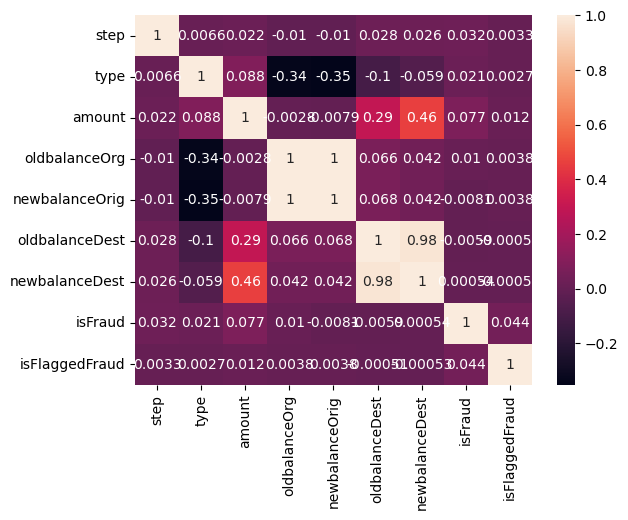

In [20]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [5]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [4]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [6]:
le=LabelEncoder()
type_le=le.fit_transform(data['type'])
data['type']=type_le

I am selecting only important features from the given data

In [7]:
X=data[['type','amount','oldbalanceOrg','newbalanceOrig']]
Y=data['isFraud']

In [9]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,Y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()
regression.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred=regression.predict(x_test)

In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))
print(metrics.precision_score(y_pred,y_test))
print(metrics.recall_score(y_pred,y_test))
print(metrics.f1_score(y_pred,y_test))

0.999129289506524
0.37469135802469133
0.8646723646723646
0.5228251507321274
